# Importing Netflix movies txt data and converting to DataFrame

In [1]:
import os
import pandas as pd
import numpy as np

# Reading all the txt files in the folder and storing them in a csv file

if not os.path.isfile('C:/Users/gatea/Documents/Machine Learning Projects/Netflix/data.csv'):
    data = open('data.csv', mode='w')
    
    row = list()
    files = [
        'C:/Users/gatea/Documents/Machine Learning Projects/Netflix/combined_data_1.txt',
        ]
    for file in files:
        print("Reading ratings from {}\n".format(file))
        with open(file) as f:
            for line in f: 
                line = line.strip()
                if line.endswith(':'):
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    data.write(','.join(row))
                    data.write('\n')
    data.close()
    
df = pd.read_csv('C:/Users/gatea/Documents/Machine Learning Projects/Netflix/data.csv', sep=',', 
    names=['movieid', 'user', 'rating', 'date'])

df.date = pd.to_datetime(df.date)
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['day'] = pd.DatetimeIndex(df['date']).day
print(len(df))
df.head()

51031355


,movieid,user,rating,date,month,year,day
0,1,1488844,3,2005-09-06,9,2005,6
1,1,822109,5,2005-05-13,5,2005,13
2,1,885013,4,2005-10-19,10,2005,19
3,1,30878,4,2005-12-26,12,2005,26
4,1,823519,3,2004-05-03,5,2004,3


# Merging movies dataset to map Movie names to Movie ids

In [80]:
movie_data = pd.read_csv('C:/Users/gatea/Documents/Machine Learning Projects/Netflix/movie_titles.csv', encoding=('latin-1'))

df3 =pd.merge(df, movie_data, how='left', on=['movieid'])
df3 = df3.loc[df3['month']==12]
df3 = df3[df3['day'].isin([25,26,27])]
#df3 = df3.loc[df3['day']==25]
print(len(df3))
df3.head()

302942


,movieid,user,rating,date,month,year,day,movieyear,moviename
3,1,30878,4,2005-12-26,12,2005,26,2003.0,Dinosaur Planet
177,1,2283366,3,2004-12-27,12,2004,27,2003.0,Dinosaur Planet
186,1,14756,4,2005-12-27,12,2005,27,2003.0,Dinosaur Planet
658,2,2345723,4,2004-12-26,12,2004,26,2004.0,Isle of Man TT 2004 Review
1006,3,2303969,4,2004-12-27,12,2004,27,1997.0,Character


In [81]:
df3['year'].unique()

array([2005, 2004, 2003, 2002, 2001, 2000, 1999], dtype=int64)

# Subsetting dataset to identify Customers and the Movies watched by them

In [82]:
col=['movieid', 'rating', 'date', 'month', 'year', 'day','movieyear'] 
#dropping unwanted col
df2=df3.drop(columns=col, axis=1)
df2.set_index('user')
df2.head()

,user,moviename
3,30878,Dinosaur Planet
177,2283366,Dinosaur Planet
186,14756,Dinosaur Planet
658,2345723,Isle of Man TT 2004 Review
1006,2303969,Character


# Converting to list

In [83]:
movies = df2.groupby('user')['moviename'].apply(list).tolist()

# Importing necessary libraries

In [84]:
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Encoding Dataset

In [85]:
encoder = TransactionEncoder().fit(movies)
onehot = encoder.transform(movies)
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
print(len(onehot))
onehot.head()

55142


,'N Sync: 'N the Mix,'N Sync: Making of the Tour,'N Sync: PopOdyssey Live,... And God Spoke,...And Justice for All,...And Then Came Summer,.hack//Legend of the Twilight,.hack//SIGN,10,10 Minute Solution: Pilates,...,Zeus and Roxanne,Zhou Yu's Train,Ziegfeld Girl,Zig Zag: Special Edition,Zombie,Zombie 3,Zombie Lake,Zone of the Enders: Idolo,Zorro,s-Cry-ed
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Applying Apriori Algorithm

### Deriving qualified rules

In [86]:
frequent_items = apriori(onehot, min_support = 0.005, max_len = 4, use_colnames = True)
print(len(frequent_items))
frequent_items.head()

292


,support,itemsets
0,0.006111,(10 Things I Hate About You)
1,0.005821,(2 Fast 2 Furious)
2,0.007109,(28 Days Later)
3,0.013783,(50 First Dates)
4,0.012078,(A Beautiful Mind)


In [92]:
rules = association_rules(frequent_items, metric = 'confidence', min_threshold = 0.3)
print(len(rules))
rules

41


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Erin Brockovich),(American Beauty),0.016884,0.019876,0.005332,0.315789,15.888014,0.004996,1.432489
1,(Billy Madison),(Happy Gilmore),0.013365,0.023503,0.007653,0.572592,24.362535,0.007339,2.284693
2,(Happy Gilmore),(Billy Madison),0.023503,0.013365,0.007653,0.325617,24.362535,0.007339,1.463019
3,(Dirty Dancing),(Miss Congeniality),0.013239,0.026368,0.005078,0.383562,14.546325,0.004729,1.579447
4,(Dirty Dancing),(Pretty Woman),0.013239,0.020456,0.006057,0.457534,22.366448,0.005786,1.805725
5,(Dirty Dancing),(Sister Act),0.013239,0.014925,0.005422,0.409589,27.442963,0.005225,1.668456
6,(Sister Act),(Dirty Dancing),0.014925,0.013239,0.005422,0.363305,27.442963,0.005225,1.549818
7,(Entrapment),(Men of Honor),0.016122,0.016503,0.005767,0.357705,21.675368,0.005501,1.531224
8,(Men of Honor),(Entrapment),0.016503,0.016122,0.005767,0.349451,21.675368,0.005501,1.512380
9,(Entrapment),(Miss Congeniality),0.016122,0.026368,0.007544,0.467942,17.746376,0.007119,1.829934


### Visualizing support metric

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

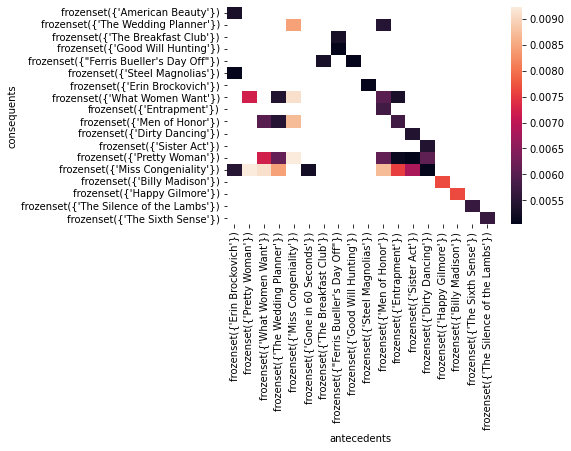

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

support_table = rules.pivot(index = 'consequents', columns = 'antecedents', values = 'support')
sns.heatmap(support_table)

### Adding Zhang's metric to the dataset

In [94]:
rules.insert(8,'Zhang metric',0)
rules['Zhang metric'] = rules.apply(lambda x : ((x['support'] - x['antecedent support'] * x['consequent support']) / max((x['support']*(1 - x['antecedent support'])), (x['antecedent support'] * x['consequent support'] - x['consequent support']))), axis=1)
print(len(rules))
rules

41


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,Zhang metric,conviction
0,(Erin Brockovich),(American Beauty),0.016884,0.019876,0.005332,0.315789,15.888014,0.004996,0.953152,1.432489
1,(Billy Madison),(Happy Gilmore),0.013365,0.023503,0.007653,0.572592,24.362535,0.007339,0.971944,2.284693
2,(Happy Gilmore),(Billy Madison),0.023503,0.013365,0.007653,0.325617,24.362535,0.007339,0.982034,1.463019
3,(Dirty Dancing),(Miss Congeniality),0.013239,0.026368,0.005078,0.383562,14.546325,0.004729,0.943748,1.579447
4,(Dirty Dancing),(Pretty Woman),0.013239,0.020456,0.006057,0.457534,22.366448,0.005786,0.968106,1.805725
5,(Dirty Dancing),(Sister Act),0.013239,0.014925,0.005422,0.409589,27.442963,0.005225,0.976488,1.668456
6,(Sister Act),(Dirty Dancing),0.014925,0.013239,0.005422,0.363305,27.442963,0.005225,0.978160,1.549818
7,(Entrapment),(Men of Honor),0.016122,0.016503,0.005767,0.357705,21.675368,0.005501,0.969495,1.531224
8,(Men of Honor),(Entrapment),0.016503,0.016122,0.005767,0.349451,21.675368,0.005501,0.969870,1.512380
9,(Entrapment),(Miss Congeniality),0.016122,0.026368,0.007544,0.467942,17.746376,0.007119,0.959113,1.829934


## Thus, we can determine the probability 'if Antecedent then Consequent' to suggest relevant movies to the user based on the Apriori algorithm metrics (support, confidence, lift, leverage and Zhang's metric)